# **LGM VIRTUAL INTERNSHIP PROGRAM 2021**

**BEGINEER LEVEL TASK 01 - IrisFlower Classification ML Project**

**Domain - DATA SCIENCE**

**Author - Shashank Raj Vijay Kumar Sharma**

Step 1 - Importing Libraries

In [15]:
#install the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import os

Step 2 - Loading DataSet

In [16]:
#Reading Iris dataset from csv file using pandas
data=pd.read_csv('IRIS.csv')

Analazying Data From DataSet

In [17]:
#retriving first 5 rows
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
#retriving last 5 rows
data.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [20]:
#Checking Shape of dataSet
data.shape

(150, 5)

In [21]:
#Checking Info of dataSet
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
#Describing dataSet
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#GroupBy coomand on Species
data.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Data Cleaning

In [23]:
#Checking For Duplicate Values
data[data.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [24]:
#removing duplicated values
data.drop_duplicates()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [25]:
#checking if there is any null value present or not
data.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

**Data Vizulization**

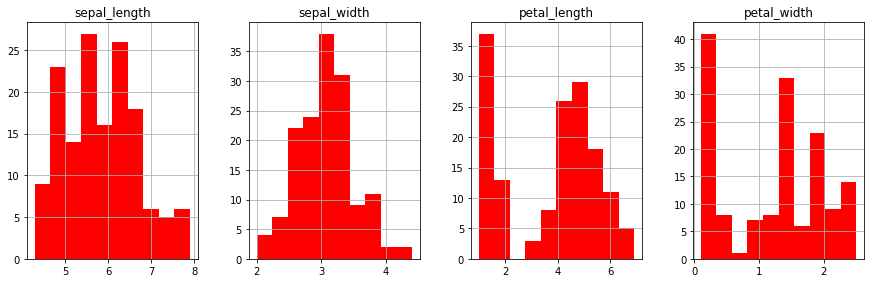

In [26]:
# Histogran
data.hist(figsize=(15,10), layout=(2,4), color="red");

### **Box Plot**

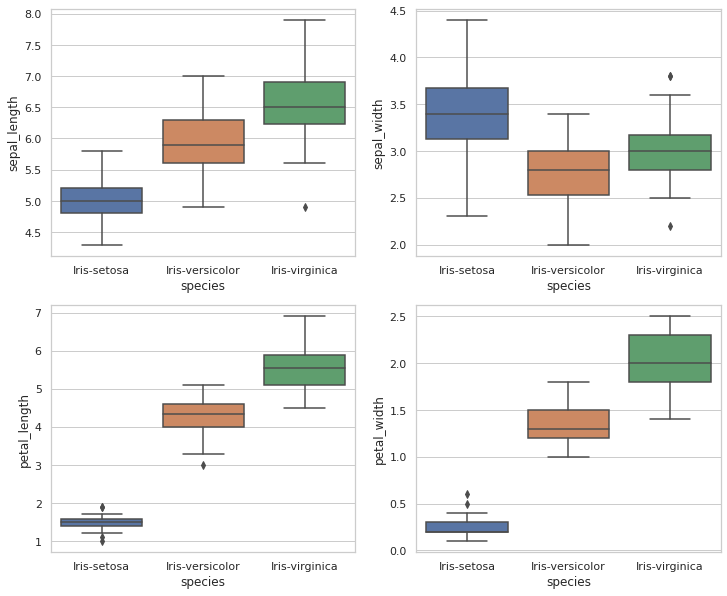

In [27]:
# Box Plot
sns.set(style="whitegrid")
plt. figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x= 'species',y='sepal_length',data=data)
plt.subplot(2,2,2)
sns.boxplot (x='species',y='sepal_width',data=data)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='petal_length',data=data)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='petal_width',data=data)
plt.show()

Violin plot

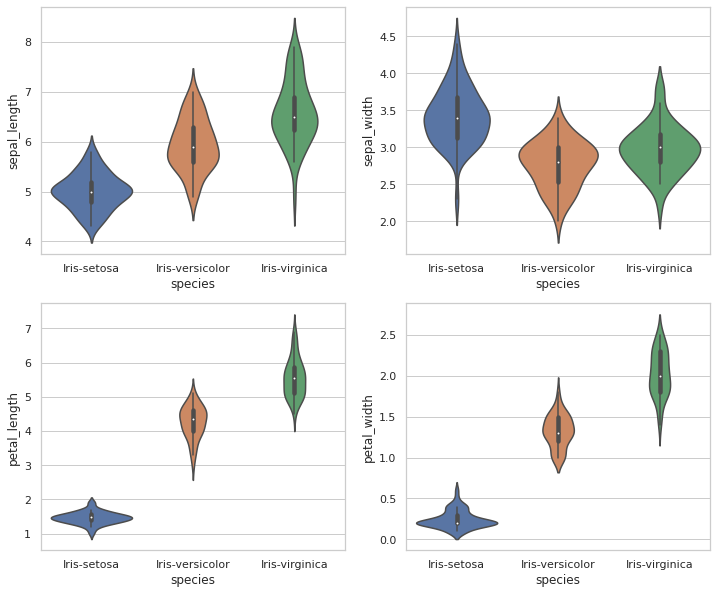

In [28]:
#Violin Plot
sns.set(style="whitegrid")
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='sepal_length',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='sepal_width',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal_length',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='petal_width',data=data) 
plt.show()

Scatter Plot

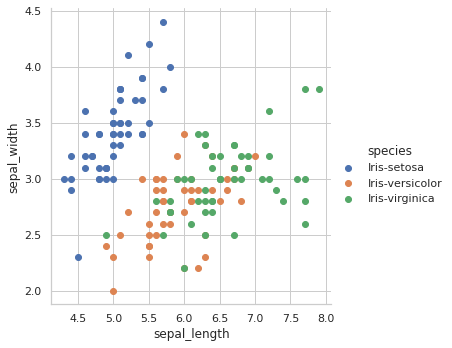

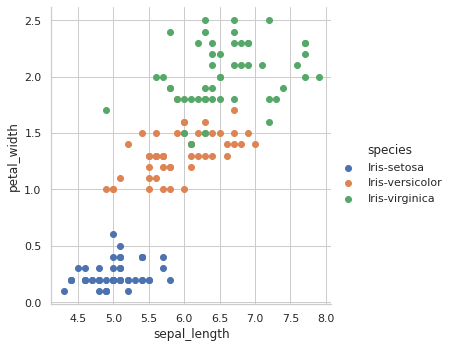

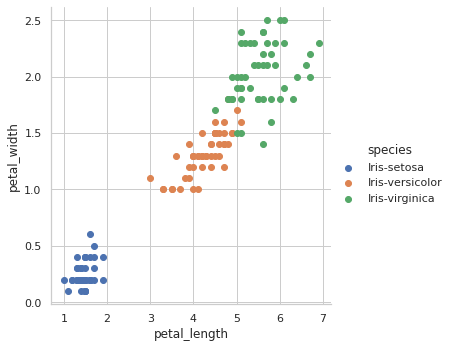

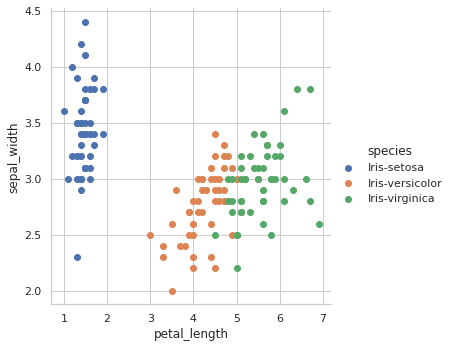

In [29]:
# Scatter Plot
sns.FacetGrid(data, hue="species", height=5).map(plt.scatter,'sepal_length','sepal_width').add_legend()
sns.FacetGrid(data, hue="species", height=5).map(plt.scatter,'sepal_length','petal_width').add_legend()
sns.FacetGrid(data, hue="species", height=5).map(plt.scatter,'petal_length','petal_width').add_legend()
sns.FacetGrid(data, hue="species", height=5).map(plt.scatter,'petal_length','sepal_width').add_legend()

**Correlational Matrix**

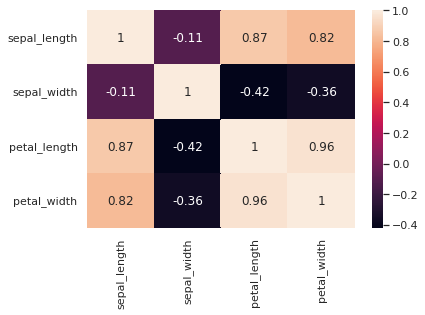

In [30]:
# Correational matrix
sns.heatmap(data.corr(), annot=True);

**Pre-Processing Data**

In [31]:
# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

In [32]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression**

In [33]:
#Train the model
model = LogisticRegression()
model.fit(x_train, y_train) 

#Test the model
predictions = model.predict(x_test)
print("\nPrediction :\n")
print(predictions)

#Check precision, recall, f1-score
print("\nClassification Report :\n")
print( classification_report(y_test, predictions))

print("\nAccuracy score of Logistic Regression is :",accuracy_score(y_test, predictions))


Prediction :

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']

Classification Report :

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Accuracy score of Logistic Regression is : 1.0


**K-Nearest Neighbours**

In [34]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))

# Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

# Accuracy score
print('\nAccuracy score of K-Nearest Neighbours is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy score of K-Nearest Neighbours is 1.0


**Support Vector Machine (SVM)**

In [35]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
# Confusion matrix
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('\nAccuracy score of SVM is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy score of SVM is 1.0


# Thank You